# Topic modelling using LDA (part A)

Topic modelling, in the context of Natural Language Processing, is described as a method of uncovering hidden structure in a collection of texts. 

Topic modeling can be used as a method for unsupervised learning of text. It can be used to group similar words within text together, thereby classifying documents into particular groups. The number of topics is a hyperparameter. By applying topic modeling we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a certain weight which indicates which topic it most likely should be in.

In the previous lectures I used word features to build the spam detection model. In this lecture I will use a classifier to use word counts as features and train the classifier to decipher the correlations between word counts. The main thing to note is that I will build categories that will contain particular types of words with a certain frequency. I will then determine what each category should be called based on the common words found within it.

There are several popular algorithms for topic modelling. 

(a) **Latent Dirichlet Allocation (LDA)** – The one we’ll be focusing on in this lecture. Its foundations are Probabilistic Graphical Models.<br>
(b) **Non-Negative Matrix Factorization (NMF)** – Based on Linear Algebra.

First I need to load the data that is going to require assignment of specific topics. I've copied the **clean_data** file from Blackboard to the jupyter notebook working directory.

In [1]:
import os
import pandas as pd
all_text_samples = []
labels = []
all_files = []
# List all files inside the "clean_data" directory
file_list = os.listdir("clean_data/")

for filename in file_list:
    # Construct filename and its path
    file = (f"clean_data/" + filename)
    my_text_file = open(file, encoding="utf8")
    file_data = my_text_file.read()
    all_text_samples.append(file_data)
    
dataframe = pd.DataFrame(all_text_samples)
dataframe.columns = ["Text"]

We have text items that do not have an associated topics. We are going to decide upon the most relevant topic for this data using LDA.

In [2]:
# Show the first sample of one row of dataframe
print(dataframe["Text"][0])

2016 Update: Whether you enjoy myth busting, Python, or just all enterprise software, you will also likely enjoy Enterprise Software with Python, presented by the author of the article below, and published by O’Reilly.

PayPal enjoys a remarkable amount of linguistic pluralism in its programming culture. In addition to the long-standing popularity of C++ and Java, an increasing number of teams are choosing JavaScript and Scala, and Braintree‘s acquisition has introduced a sophisticated Ruby community.

One language in particular has both a long history at eBay and PayPal and a growing mindshare among developers: Python.

Python has enjoyed many years of grassroots usage and support from developers across eBay. Even before official support from management, technologists of all walks went the extra mile to reap the rewards of developing in Python. I joined PayPal a few years ago, and chose Python to work on internal applications, but I’ve personally found production PayPal Python code fr

Let's examine the first few rows of the constructed dataframe. Each row does not have an associated topic for the textfile.

In [3]:
dataframe.head()

,Text
0,"2016 Update: Whether you enjoy myth busting, P..."
1,Let's start with the truth. The 3-point shot w...
2,Media playback is not supported on this device...
3,Krampus with babies postcard (via riptheskull/...
4,"Last week, Michael Dorf published a long and c..."


In [4]:
len(dataframe)

7911

There's 7911 articles of text data in the dataframe that I've just constructed.

We will use Latent Dirichlet Allocation (LDA) to cluster the most popular words for groups of text file with the same popular words wihtin them.

First we will pre-proces the text data using the scikit-learn count vectorizer to remove common words, ensure that we have words that meet a minuimum frequency within documnts. We'll also remove all english stop words.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

Then we initialise an instance of the count vectorizer. When building the count vectorizer we must choose 2 terms that define the linimum and maximum number of words we should ignore within our documents.

The **`max_df`** option accepts a float in range [0.0, 1.0] or int, default=1.0<br>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

The **`min_df`** option accepts a float in range [0.0, 1.0] or int, default=1<br>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None. In this tutorial, I've set the `min_df` value to **4** because I want to ensure that the vocabulary is in at least 4 documents. We can reduce this number if we want more common words to appear in all of the documents.

We can remove all stop words using the **`stop_words`** command. This attribute can get large and increase the model size.

In [6]:
# max_df and min_df can be either a range between 0-1 or an int.
# In this example, I'm setting min_df to 4 to ensure that
# words are detected in at least 4 documents.
count_vectorizer = CountVectorizer(max_df=0.90, min_df=4, stop_words="english")

We don't create a train/test split with the data since this is an unsupervised method of determining categories. And we don't have any test data to examine predicted reuslts against actual labelled text values. Instead we perform a fit-transform to the entire text dataset.

In [7]:
doc_term_matrix = count_vectorizer.fit_transform(dataframe["Text"])

The document term matrix is a sparse matrix of each word in all of the text data. For example, ths dtm contains 7911 articles with 45783 terms (words). Adjusting the max_df and min_df values can increase or decrease the number of terms in the dtm.

In [8]:
doc_term_matrix

<7911x45783 sparse matrix of type '<class 'numpy.int64'>'
	with 3482007 stored elements in Compressed Sparse Row format>

## Latent Dirichlet Allocation

components_ : array, [n_components, n_features] Variational parameters for topic word distribution. Since the complete conditional for topic word distribution is a Dirichlet, ``components_[i, j]`` can be viewed as pseudocount that represents the number of times word `j` was assigned to topic `i`.

It can also be viewed as distribution over the words for each topic after normalization:
    ``model.components_ / model.components_.sum(axis=1)[:, np.newaxis]``.
    
The number of topics is an integer number set by the option `n_components`. In this example, I'm defining the number of topics to 10. This is a number that is set by trying out values and arriving at one which suits the contents of the text. If these appears to be several topics with the same contents of words within them, set the number of topics to a lower value. This will amalgamate most popular words to less topics.

If there appears to be topics with lots of different types of words within them, this could indicate that there could be more topics than the number you've assigned to the dataset. In that case, increase the number of topics to a higher value and re-run your model. Eventually you will find that there will be topics then with the same content of words within them. That indicates that the optimum number of topics for the dataset is around that vlaue you've selected. Then you can fine-tune the number of assigned topics assigned to your model.

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

In [10]:
lda = LatentDirichletAllocation(n_components=20,random_state=1)

In [11]:
lda.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=20, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=1, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

Now we can examine the performance of this model by examining the **log likelihood** and **perplexity** metrics of the model.

With the log likelihood value, higher numbers are better than lower numbes when comparing models.

With the perplexity value, a lower perplexity value is better than a higher one when comparing models. The perplexity value is calculated as 

*Perplexity = exp(-1. * log-likelihood per word)*

In [12]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", lda.score(doc_term_matrix))

Log Likelihood:  -54208332.46436615


In [13]:
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(doc_term_matrix))

Perplexity:  5318.913451710908


### How to use `GridSearch` for the best LDA model

The most important tuning parameter for LDA models is `n_components` (number of topics). In addition, I am going to search `learning_decay` (which controls the learning rate) as well.

Besides these, other possible search params could be `learning_offset` (downweigh early iterations. Should be > 1) and `max_iter`. These could be worth experimenting if you have enough computing resources.

**Be warned, gridsearch constructs multiple LDA models for all possible combinations of param values in the `param_grid` dictionary. So this process can consume a lot of time and resources. Therefore be patient. When I ran this option it took 2 hours to return my results.**

`GridSearchCV` implements a **fit** and a **score** method. It also implements **predict**, **predict_proba**, **decision_function**, **transform** and **inverse_transform** if they are implemented in the estimator used. See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html for more information.

Also see https://code.i-harness.com/en/docs/scikit_learn/modules/generated/sklearn.model_selection.gridsearchcv

Now I'm gong to build a new LDA model with `GridSearch` so I can compare the results.

In [14]:
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda_comparison = LatentDirichletAllocation()

# Init Grid Search Class
lda_comparison = GridSearchCV(lda_comparison, param_grid=search_params)

# Do the Grid Search
lda_comparison.fit(doc_term_matrix)

C:\Users\James\Anaconda3\envs\ai2_course\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_components': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

And now we can use this information to find out the important comparison metrics.

In [15]:
# Best Model which gave highest score 
best_lda_model = lda_comparison.best_estimator_

# Model Parameters is used to store a list of parameter settings dicts for all the parameter candidates
print("Best Model's Params: ", lda_comparison.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", lda_comparison.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(doc_term_matrix))

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -18746788.238628864
Model Perplexity:  5561.752238087095


### Compare LDA Model Performance Scores

The earlier model of 20 components and a default decay of 0.7. That model had a Log Likelihood of **-54208332.46436615**, and Perplexity of **5318.913451710908**. 

Results generated by the `GridSearch` show number of topics = 10 has better scores. And `learning_decay` of 0.7 outperforms both 0.5 and 0.9. The Log Likelihood of this model is **-18746788.238628864** which is larger than the model I created earlier. The Perplexity value of **5561.752238087095** is larger than the original model which suggests that the first model could be better. 

So even though we started with 20 distinct topics, some topics could share common keywords. For example, **motorcycles** and **cars**, **pc hardware** and **mac hardware**.

To tune this even further, you can do a finer grid search for number of topics between 5 and 15. But I am going to skip that for now.

So a lower optimal number of distinct topics (even 10 topics) may be reasonable for this dataset. And a `learning_decay` value of 0.7 seems to be the optimum level. I don’t know that yet. But LDA says so. Let’s see how that works out.

Now I'm going to rebuild the model with the new settings suggested by `GridSearch`. I'm not going to input a value for `learning_decay` as the default is what is suggested as the optimum model by `GridSearch`.

In [35]:
lda = LatentDirichletAllocation(n_components=10,random_state=1)

And I'll fit the model again with these new values recommended by `GridSearch`.

In [36]:
lda.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=1, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

Lets examine what the log likelihood and perplexity values are.

In [37]:
print("Log Likelihood: ", lda.score(doc_term_matrix))
print("Perplexity: ", lda.perplexity(doc_term_matrix))

Log Likelihood:  -54619996.62116641
Perplexity:  5676.978386836095


### Word vocabulary

The count vectorizer contains a list of all words that were found within the text documents, with the `max_df`, `min_df` and `stop words` applied to them. 

In [38]:
len(count_vectorizer.get_feature_names())

45783

When we know the length of the count vectorizer (which is a list), we can examine any of the words within it that is within the length of the list.

For example, to see word 700 we simply type:

In [39]:
count_vectorizer.get_feature_names()[700]

'2pm'

The LDA consists of 10 components containing the probability for each word in the count vectorizer. I set the number of components using the `n_components` option when fitting LDA with the dtm.

In [40]:
lda.components_

array([[1.10639106e+01, 1.53501573e+03, 1.00001937e-01, ...,
        1.00011451e-01, 1.00002908e-01, 1.00002963e-01],
       [4.25320530e+01, 9.36013737e+02, 3.80958727e+00, ...,
        1.00013365e-01, 1.00000000e-01, 1.00036914e-01],
       [3.24149536e+01, 2.72326043e+01, 1.00026045e-01, ...,
        1.00002969e-01, 1.00016871e-01, 1.14851716e+00],
       ...,
       [1.00012362e-01, 2.99500946e+02, 1.00012134e-01, ...,
        6.09994945e+00, 1.00020349e-01, 1.39723201e+00],
       [4.01616522e+01, 6.68081695e+02, 1.00001637e-01, ...,
        1.00000183e-01, 1.00009829e-01, 1.00000000e-01],
       [7.95734719e+01, 2.86610395e+02, 2.47907651e+00, ...,
        1.00010873e-01, 2.20789665e+00, 1.00082060e-01]])

In [41]:
lda.components_.shape

(10, 45783)

We can view the most popular words in a topic by choosing its component number. For example, to view the probability of all words in the LDA for topic 1 we can view it as follows:

In [42]:
# load the index positions of the first topic into an array
first_topic = lda.components_[0]

We can view the sorted index positions of the least to greatest values of the probability of words using the `argsort()` command. Otherwise we would have a random list of index positions based on the count vectorizer. 

The outputted list represents the entire index positions of all probabilities of words for the entire vocabulary.

In [43]:
first_topic.argsort()

array([41333, 18234, 18506, ..., 30209, 19360, 35646], dtype=int64)

The argsort array is the same size as the count vectorizer since is represents a list of probabilities for all words that exist in the vocabulary of words from the text files.

In [44]:
len(first_topic.argsort()), type(first_topic.argsort())

(45783, numpy.ndarray)

We can view the highest probabilities of words for a topic by going to the end of the array and chooing the least number of numbers. For example, to view the top 15 highest probability of words for the first topic, going from 15th to 1st, we simply use this command:

In [45]:
first_topic.argsort()[-15:]

array([39493, 25798, 29929, 27795, 24148, 43058, 45551, 35934, 36067,
        7121, 39486,  7926, 30209, 19360, 35646], dtype=int64)

Then we can view the corresponding words associcted with the index positions of these words by getting the word that is referenced by a particular index position as follows:

In [46]:
print(count_vectorizer.get_feature_names()[39493])

study


In [47]:
print(count_vectorizer.get_feature_names()[35646])

said


And I can show these words in the first topic using a loop. I'll define a function first to take in the x and y axis data and to then generate a bar chart of the most common words.

In [48]:
def show_chart(words, count, chart_title):
    import matplotlib.pyplot as plt
    d = pd.DataFrame({"Words": word_list, "Count": probability_list})
    # Sort the dataframe by largest count
    d = d.sort_values(by=["Count"], ascending=False)
    ax = d.plot.bar(y = "Count", 
                    x="Words", 
                    title= chart_title, 
                    figsize=(15, 10), 
                    legend=True, 
                    fontsize=12, 
                    rot=1)
    ax.set_xlabel("Frequent words", fontsize=12)
    ax.set_ylabel("Word count", fontsize=12)

study
medical
patients
new
like
university
years
says
school
care
students
children
people
health
said


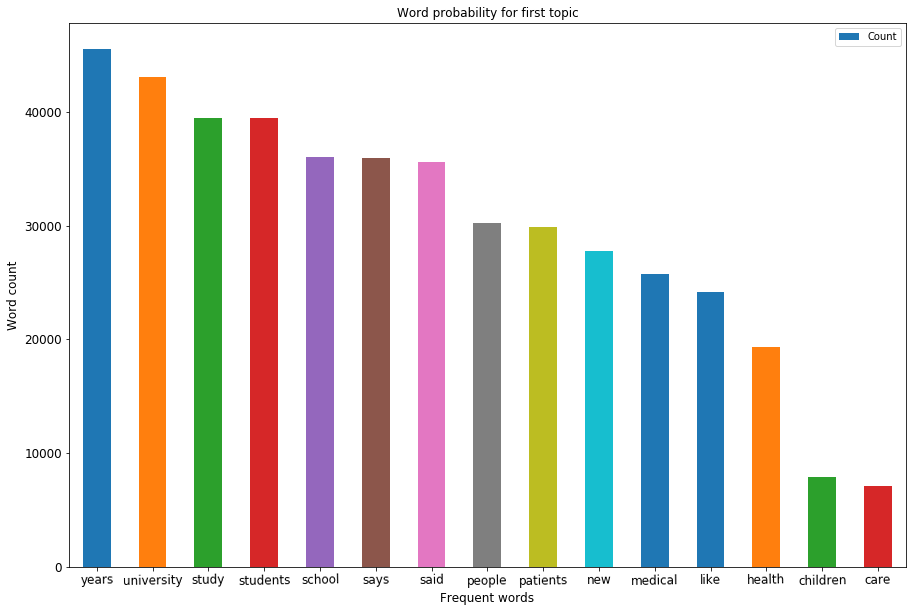

In [49]:
word_list = []
probability_list = []

for index in first_topic.argsort()[-15:]:
    frequent_word = count_vectorizer.get_feature_names()[index]
    print(frequent_word, sep=" ")
    word_list.append(frequent_word)
    probability_list.append(index)
    
show_chart(word_list, probability_list, "Word probability for first topic")

With this logic in mind, we can create a loop to show the top number of words for each topic. When I created the original LDA I defined the number of topics with the option `n_components`. I set it to 10.

Top words for topic 0 are : 
['study']['medical']['patients']['new']['like']['university']['years']['says']['school']['care']['students']['children']['people']['health']['said']

Top words for topic 1 are : 
['driving']['republican']['health']['income']['weight']['fat']['new']['cars']['just']['like']['diet']['percent']['car']['trump']['people']

Top words for topic 2 are : 
['new']['learning']['people']['code']['don']['things']['way']['just']['make']['like']['need']['data']['work']['use']['time']

Top words for topic 3 are : 
['protein']['add']['plants']['cooking']['good']['eat']['oil']['use']['time']['just']['species']['make']['like']['water']['food']

Top words for topic 4 are : 
['million']['industry']['years']['year']['ai']['big']['like']['says']['technology']['companies']['said']['business']['data']['new']['company']

Top words for topic 5 are : 
['years']['games']['time']['player']['league']['play']['football']['like']['just']['said']['season']['players']['year']['team']['game']


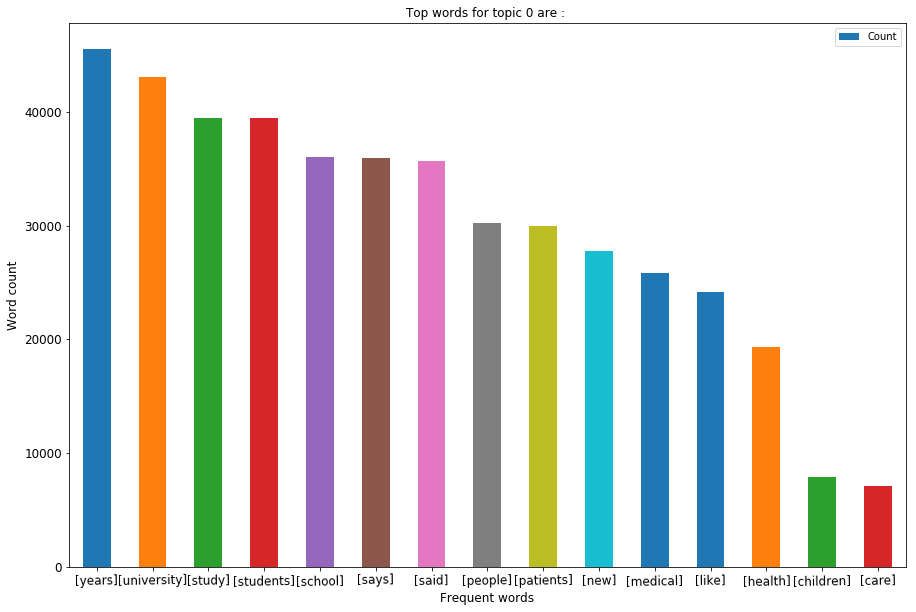

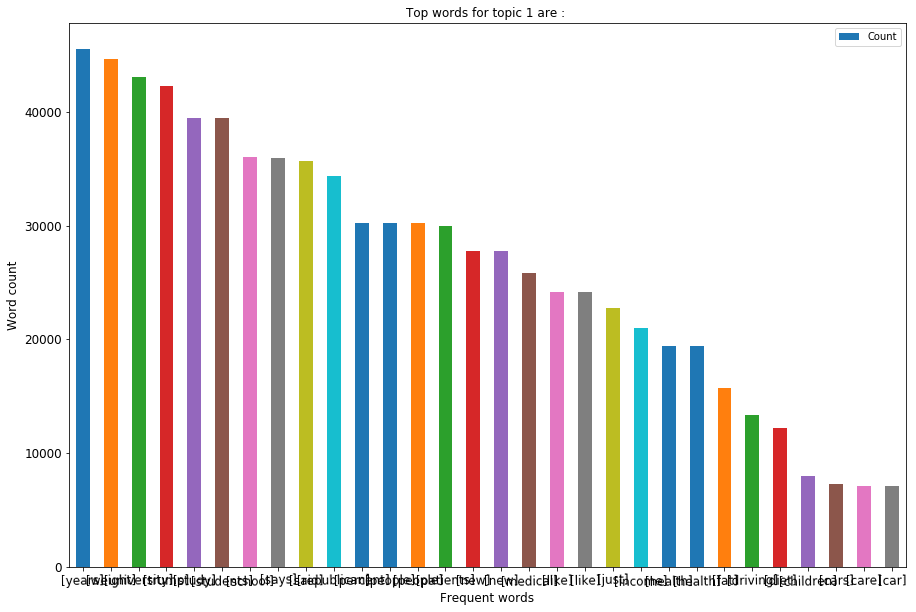

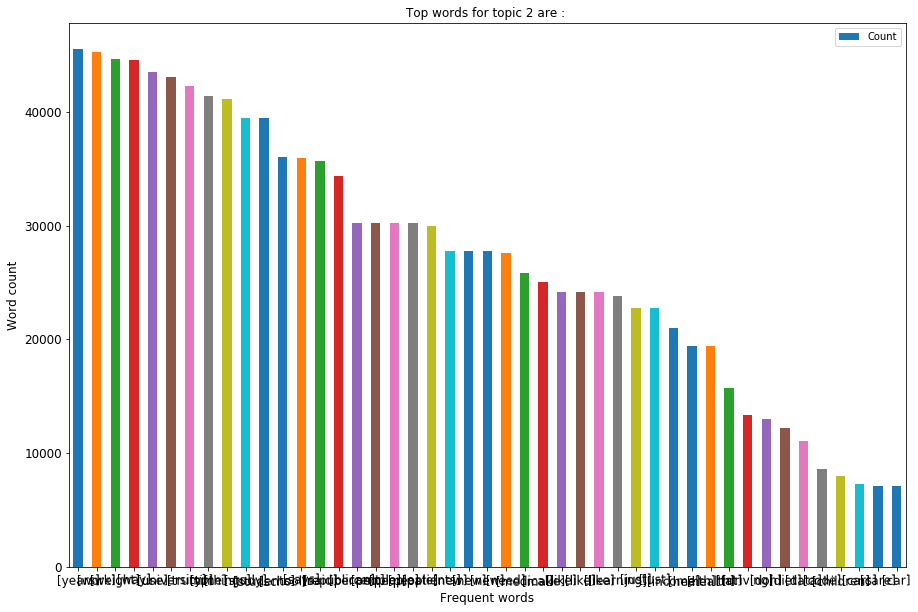

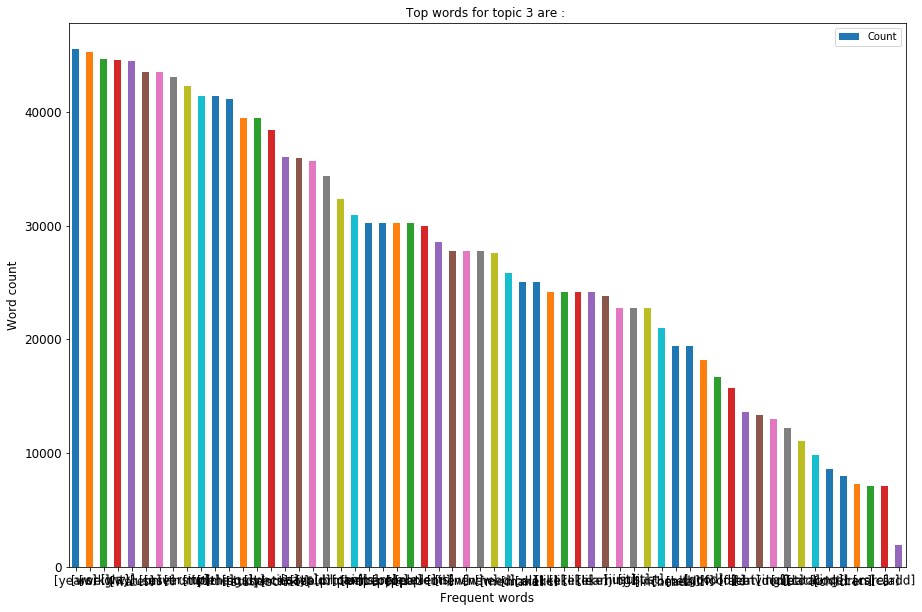

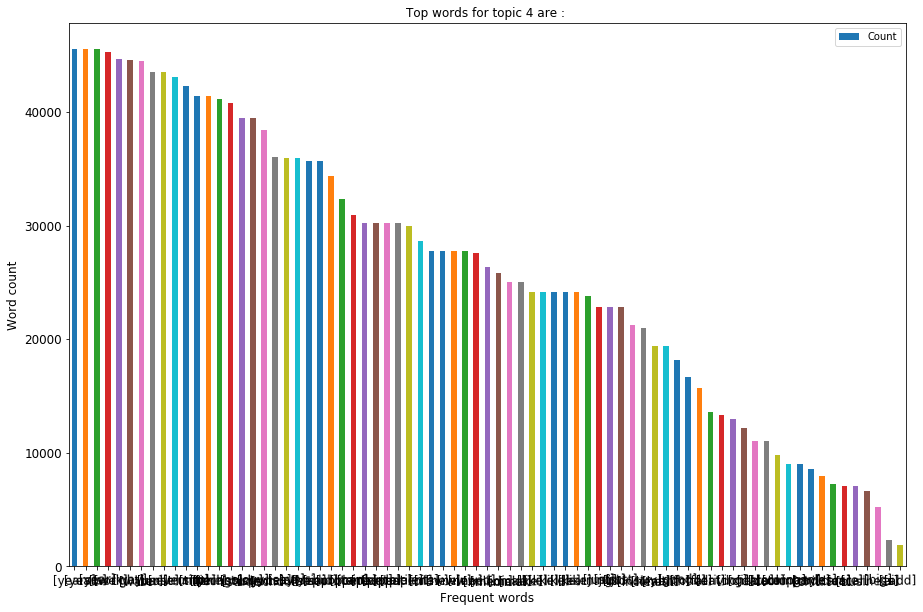

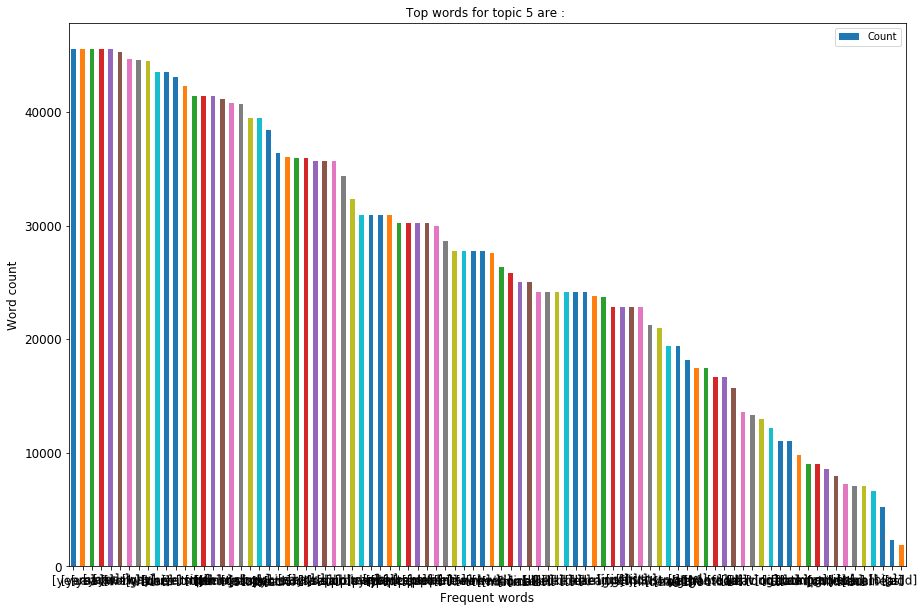

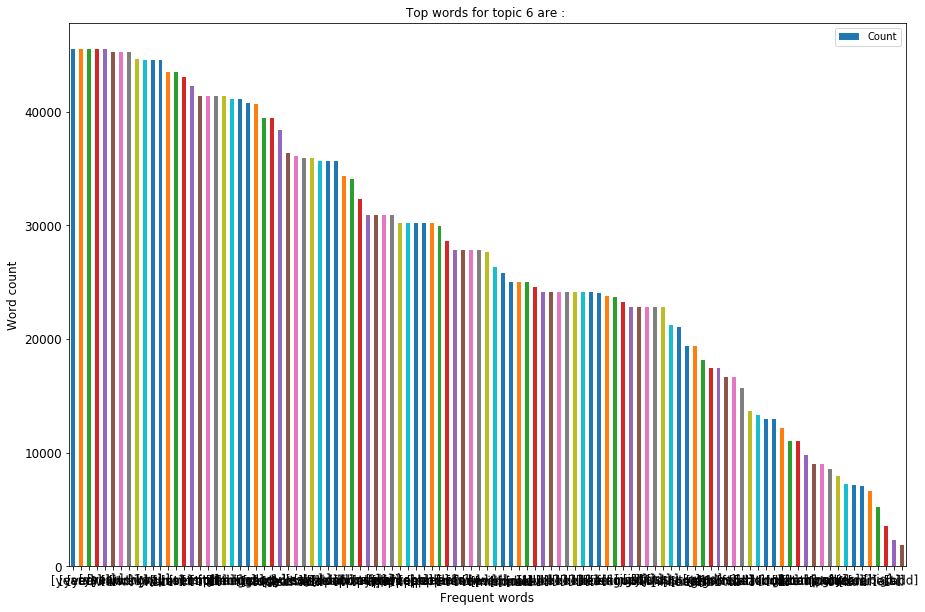

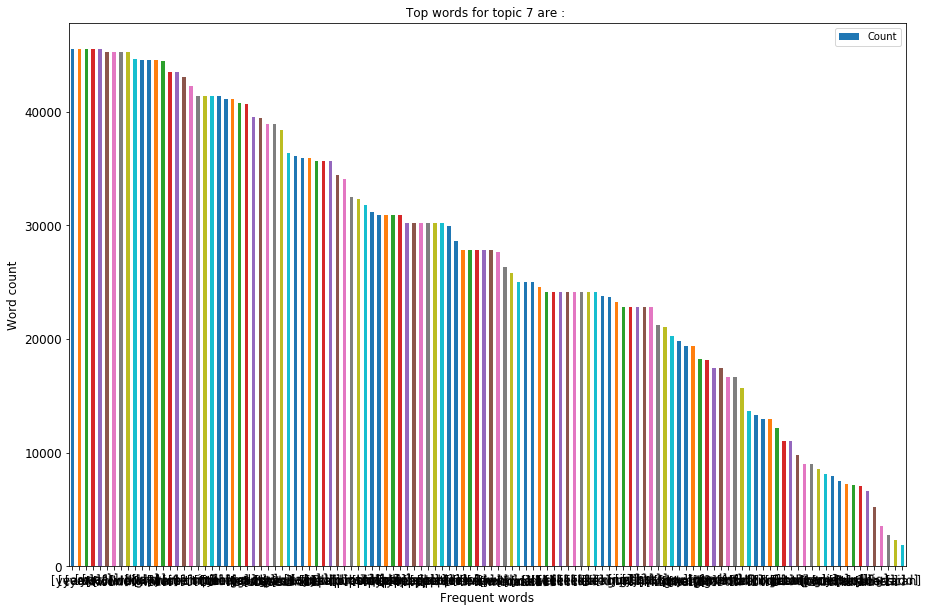

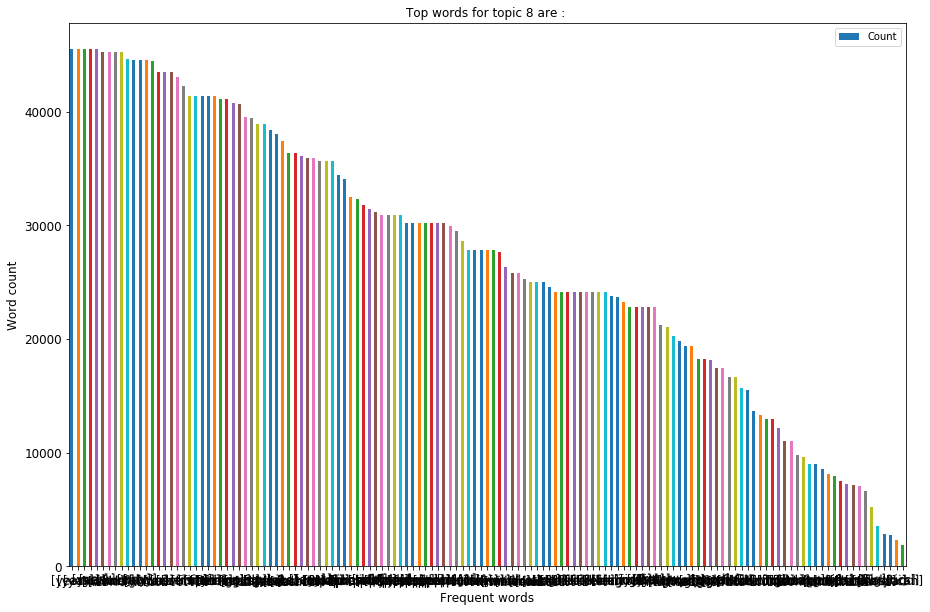

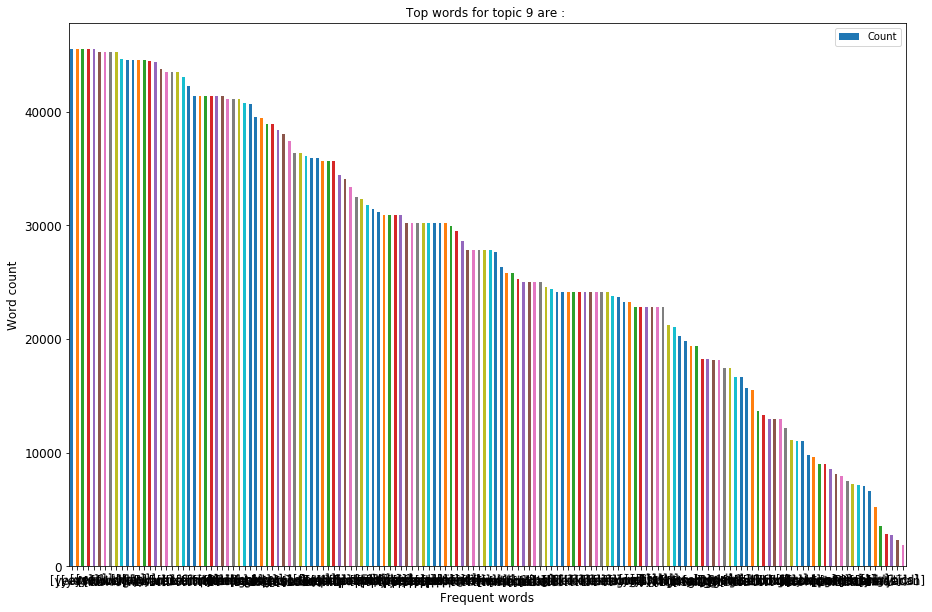

In [50]:
word_list = []
probability_list = []

top_number = 15
count = 0
for probability_number in lda.components_:
    text_message = f"Top words for topic {count} are : "
    print(text_message)    
    for number in probability_number.argsort()[-top_number:]:
        print([count_vectorizer.get_feature_names()[number]], end= "")
        word_list.append([count_vectorizer.get_feature_names()[number]])
        probability_list.append(number)
    show_chart(word_list, probability_list, text_message)
    print("\n")  
    count += 1


And I can increase the number of words in each topic by simply increasing the number of words extracted into the top words array:

In [51]:
top_number = 20
count = 0
for probability_number in lda.components_:
    print(f"Top words for topic {count} are : ")    
    for number in probability_number.argsort()[-top_number:]:
        print([count_vectorizer.get_feature_names()[number]], end= "")
    print("\n")
    count += 1

Top words for topic 0 are : 
['family']['hospital']['time']['parents']['year']['study']['medical']['patients']['new']['like']['university']['years']['says']['school']['care']['students']['children']['people']['health']['said']

Top words for topic 1 are : 
['low']['economic']['year']['high']['economy']['driving']['republican']['health']['income']['weight']['fat']['new']['cars']['just']['like']['diet']['percent']['car']['trump']['people']

Top words for topic 2 are : 
['example']['different']['ll']['want']['using']['new']['learning']['people']['code']['don']['things']['way']['just']['make']['like']['need']['data']['work']['use']['time']

Top words for topic 3 are : 
['ingredients']['plant']['years']['healthy']['recipe']['protein']['add']['plants']['cooking']['good']['eat']['oil']['use']['time']['just']['species']['make']['like']['water']['food']

Top words for topic 4 are : 
['world']['people']['market']['work']['time']['million']['industry']['years']['year']['ai']['big']['like']['says'

Topic 0 is looking like a **medical healthcare** topic. Topic 1 could be a **political** or **economic** topic.

We could increase the number of topics to further increase the range of topics available to us by increasing the `n_components` value during the LDA construction. 

For example, now I'm increasing the number of topics to 30 to see what effect this has on the spread of words in each topic. 

** Note** More topics = more time to build the model.

In [52]:
from sklearn.decomposition import LatentDirichletAllocation

In [53]:
lda = LatentDirichletAllocation(n_components=30,random_state=1)

In [54]:
lda.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=30, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=1, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

Now we have a list of 30 topics with a list of probabilities for words in each topic.

In [55]:
lda.components_.shape

(30, 45783)

Lets view the new list of top 20 words within each of the 30 topics.

In [56]:
top_number = 20
count = 0
for probability_number in lda.components_:
    print(f"Top words for topic {count} are : ")    
    for number in probability_number.argsort()[-top_number:]:
        print([count_vectorizer.get_feature_names()[number]], end= "")
    print("\n")
    count += 1

Top words for topic 0 are : 
['work']['brain']['child']['people']['year']['schools']['years']['student']['kids']['says']['research']['education']['parents']['college']['said']['study']['university']['children']['school']['students']

Top words for topic 1 are : 
['food']['species']['disease']['000']['new']['researchers']['humans']['percent']['gene']['says']['study']['scientists']['like']['human']['just']['genes']['years']['dna']['genetic']['people']

Top words for topic 2 are : 
['work']['second']['think']['example']['point']['favorite']['rights']['way']['lawyer']['practice']['court']['use']['does']['good']['state']['case']['law']['right']['people']['legal']

Top words for topic 3 are : 
['ferrari']['vehicle']['years']['road']['f1']['speed']['hamilton']['said']['50']['drive']['time']['race']['traffic']['team']['year']['drivers']['driver']['driving']['cars']['car']

Top words for topic 4 are : 
['debt']['time']['capital']['investment']['firm']['bank']['income']['accounting']['new']['yea

With these new results, it is more obvious that topic 0 contains words relating to **education**, topic 1 contains words within the broad topic **research** or **science**. Topic 2 could be called **law**. And topic 3 is about **sports** or **motor racing**. At this point, we need to go through each topic and see if the words they contain overlap alot with other topics or not. 

**Note** There could be some topics that may contain some similar words, so a few repeating words does not necessarily indicate that you are applying too many topics. You need to experiment with the number of topics, and the `max_df` and `min_df` values to find the optimum solution.

### Add topic number to original dataframe

Now I would like to add the relevant topic number to the original dataframe.

We can view the probability of each particular text file belonging to a particular topic as follows:

In [57]:
textfile_topics = lda.transform(doc_term_matrix)

In [58]:
textfile_topics

array([[2.54258835e-05, 2.54258835e-05, 2.54258835e-05, ...,
        2.54258835e-05, 2.54258835e-05, 1.35829343e-02],
       [1.12612613e-04, 4.74591311e-02, 1.12612613e-04, ...,
        1.12612613e-04, 5.67152187e-02, 1.12612613e-04],
       [3.55366027e-05, 3.55366027e-05, 3.55366027e-05, ...,
        5.06904254e-02, 3.55366027e-05, 3.55366027e-05],
       ...,
       [3.65706191e-02, 4.37957995e-03, 5.63893059e-02, ...,
        3.97298371e-05, 3.97298371e-05, 3.97298371e-05],
       [4.17710944e-05, 4.17710944e-05, 4.17710944e-05, ...,
        4.17710944e-05, 4.17710944e-05, 3.02135219e-02],
       [8.36800807e-02, 1.42450142e-04, 1.42450142e-04, ...,
        1.42450142e-04, 1.42450142e-04, 1.42450142e-04]])

Lets view the index values of each word for the first text file

In [59]:
textfile_topics[0]

array([2.54258835e-05, 2.54258835e-05, 2.54258835e-05, 2.54258835e-05,
       2.09202362e-02, 2.54258835e-05, 2.54258835e-05, 2.54258835e-05,
       2.54258835e-05, 2.54258835e-05, 2.54258835e-05, 2.54258835e-05,
       8.57170443e-02, 2.54258835e-05, 5.60295987e-02, 2.54258835e-05,
       2.54258835e-05, 2.12842375e-02, 2.39007609e-01, 2.11493719e-02,
       2.54258835e-05, 3.17803443e-03, 2.54258835e-05, 1.30475192e-01,
       3.89229689e-01, 1.89429611e-02, 2.54258835e-05, 2.54258835e-05,
       2.54258835e-05, 1.35829343e-02])

In [60]:
# Contains list of the 30 topics for each text file, so there are
# 7911 text files
textfile_topics.shape

(7911, 30)

To see the values as a more representative topic number, we can round these values up. This example shows the index positions for each topic for the first text file.

In [61]:
textfile_topics[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.09, 0.  , 0.06, 0.  , 0.  , 0.02, 0.24, 0.02, 0.  , 0.  ,
       0.  , 0.13, 0.39, 0.02, 0.  , 0.  , 0.  , 0.01])

To view the highest value in the particular topic we can use `.argmax()` command. This number is the position of the highest probability number in the array for topic 0.

In [65]:
textfile_topics[0].argmax()

24

It appears that the first text file belongs to topic number 24.

In [62]:
examined_topic = lda.components_[24]

In [63]:
# Show more words for better topic selection for this topic (24)
for index in examined_topic.argsort()[-50:]:
    print(count_vectorizer.get_feature_names()[index], end=" ")

simple functions room learn image line example eye java building programmer class objects foundation good pattern white add programmers string paint don brush way create program type need time colors light different work new object just languages makeup using used function look make language like design color programming use code 

This topic appears to be a computer programming or technology topic. Lets view the contents of this document to see how that matches with its contents.

In [66]:
print(dataframe["Text"][0])

2016 Update: Whether you enjoy myth busting, Python, or just all enterprise software, you will also likely enjoy Enterprise Software with Python, presented by the author of the article below, and published by O’Reilly.

PayPal enjoys a remarkable amount of linguistic pluralism in its programming culture. In addition to the long-standing popularity of C++ and Java, an increasing number of teams are choosing JavaScript and Scala, and Braintree‘s acquisition has introduced a sophisticated Ruby community.

One language in particular has both a long history at eBay and PayPal and a growing mindshare among developers: Python.

Python has enjoyed many years of grassroots usage and support from developers across eBay. Even before official support from management, technologists of all walks went the extra mile to reap the rewards of developing in Python. I joined PayPal a few years ago, and chose Python to work on internal applications, but I’ve personally found production PayPal Python code fr

Now I'm using a loop to find the highest topic number that each document belongs to and then assigning that number to the data frame.

In [67]:
topic_list = []
# Textfile_topics is a list of arrays containing 
# all index positions of words for each textfile
for popular_index_pos in textfile_topics:
    # Get the max index position in each array
    # and add to the topic_list list
    topic_list.append(popular_index_pos.argmax())

# Add a new column to the dataframe
dataframe["Topic number"] = topic_list

In [68]:
dataframe

,Text,Topic number
0,"2016 Update: Whether you enjoy myth busting, P...",24
1,Let's start with the truth. The 3-point shot w...,10
2,Media playback is not supported on this device...,3
3,Krampus with babies postcard (via riptheskull/...,19
4,"Last week, Michael Dorf published a long and c...",2
5,"""Eva Braun was the ""first lady"" of the Third R...",19
6,Reproducción automática Si la reproducción aut...,29
7,"Journal reference:\n\nIn C. Freksa, ed., Found...",23
8,1. Keep makeup remover next to your bed so you...,24
9,"Here, we refrain from providing another genera...",1


Now we can examine each topic and assign matching descrptions for each topic number. I'll create a list of topic number with relevant text and then match the topic number to the relevant topic text using the list.

In [69]:
topic_list = {0: "Education", 
              1: "Research", 
              2: "Law", 
              3: "Sport", 
              4: "Finance", 
              5: "Health", 
              6: "horoscopes", 
              7: "Environment", 
              8: "Economy", 
              9: "Various", 
              10: "Sport", 
              11: "Cooking", 
              12: "Career", 
              13: "gardening", 
              14: "I.T.", 
              15: "Fashion", 
              16: "Religion", 
              17: "Crypto-currency", 
              18: "Tech news", 
              19: "History", 
              20: "Relationships", 
              21: "Social media", 
              22: "War", 
              23: "AI", 
              24: "Design", 
              25: "Politics", 
              26: "Health", 
              27: "Exercise", 
              28: "Sport", 
              29: "Social media"}

topic_no_to_topic = dataframe["Topic number"].map(topic_list)

And Im assigning these values back to the data frame.

In [70]:
dataframe["Topic desc"] = topic_no_to_topic

Now we can view each document as well as the assigned topic number and each topic description.

In [71]:
dataframe

,Text,Topic number,Topic desc
0,"2016 Update: Whether you enjoy myth busting, P...",24,Design
1,Let's start with the truth. The 3-point shot w...,10,Sport
2,Media playback is not supported on this device...,3,Sport
3,Krampus with babies postcard (via riptheskull/...,19,History
4,"Last week, Michael Dorf published a long and c...",2,Law
5,"""Eva Braun was the ""first lady"" of the Third R...",19,History
6,Reproducción automática Si la reproducción aut...,29,Social media
7,"Journal reference:\n\nIn C. Freksa, ed., Found...",23,AI
8,1. Keep makeup remover next to your bed so you...,24,Design
9,"Here, we refrain from providing another genera...",1,Research
